In [118]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [5]:
train_data = pd.read_csv('train.csv')

In [6]:
test_data = pd.read_csv('test.csv')

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
sex_data = train_data[['Sex','Survived']].groupby('Sex').agg({'count','sum','mean'})
 
sex_data.columns = ['Number of people','Survived','Survived Ration']
sex_data['Died'] = sex_data['Number of people'] - sex_data['Survived']
sex_data

,Number of people,Survived,Survived Ration,Died
Sex,,,,
female,233,0.742038,314,232.257962
male,109,0.188908,577,108.811092


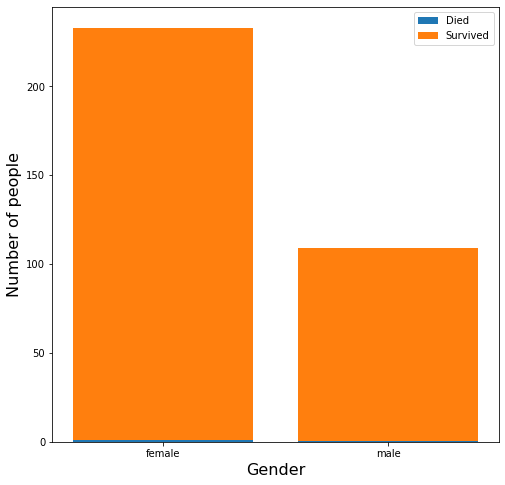

In [10]:
fig ,ax = plt.subplots(figsize=(8,8))
ax.bar(x = sex_data.index,height=sex_data['Survived'],label='Died')
ax.bar(x = sex_data.index,height=sex_data['Died'],bottom=sex_data['Survived'],label='Survived')
plt.ylabel('Number of people',fontsize=16)
plt.xlabel('Gender',fontsize=16)
plt.legend()
plt.show()

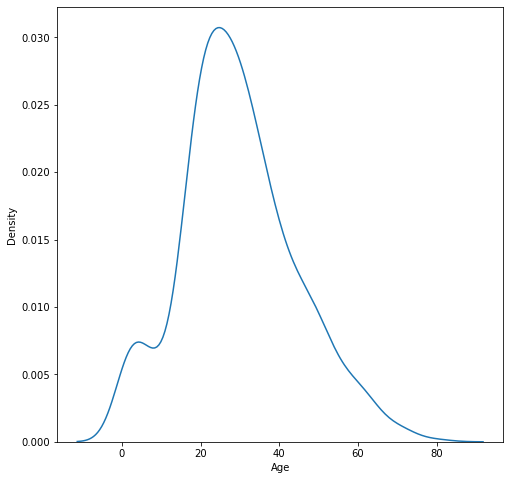

In [11]:
plt.subplots(figsize=(8,8))
sns.kdeplot(data=train_data['Age'])
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

In [12]:
survived = train_data[['Survived','Pclass']].groupby('Survived').agg({'count'})
survived.columns = ['Number of people']
survived

,Number of people
Survived,
0,549
1,342


C:\Users\kgu96\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Survived')

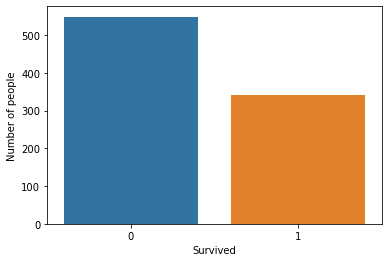

In [13]:
sns.countplot(train_data['Survived'])
plt.ylabel('Number of people')
plt.xlabel('Survived')

In [14]:
train_data['Gender'] = train_data['Sex'].replace({'female':1,'male':0})

In [15]:
test_data['Gender'] = test_data['Sex'].replace({'female':1,'male':0})

In [16]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Gender           0
dtype: int64

In [17]:
train_data['name_title'] = train_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [18]:
test_data['name_title'] = test_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [19]:
train_data['fill_age'] =train_data['Age']

In [20]:
test_data['fill_age'] =test_data['Age']

In [21]:
for title in train_data['name_title'].unique():
    train_data.loc[train_data['name_title']==title,'fill_age']=train_data.loc[train_data['name_title']==title,'Age'].fillna(train_data.loc[train_data['name_title']==title,'Age'].median())

In [22]:
for title in test_data['name_title'].unique():
    test_data.loc[test_data['name_title']==title,'fill_age']=test_data.loc[test_data['name_title']==title,'Age'].fillna(test_data.loc[test_data['name_title']==title,'Age'].median())

In [23]:
train_data1 = train_data.drop(['Name','Cabin','Sex','Age'],axis=1)

In [24]:
test_data1 = test_data.drop(['Name','Cabin','Sex','Age'],axis=1)

In [25]:
train_data1

,PassengerId,Survived,Pclass,SibSp,Parch,Ticket,Fare,Embarked,Gender,name_title,fill_age
0,1,0,3,1,0,A/5 21171,7.2500,S,0,Mr,22.0
1,2,1,1,1,0,PC 17599,71.2833,C,1,Mrs,38.0
2,3,1,3,0,0,STON/O2. 3101282,7.9250,S,1,Miss,26.0
3,4,1,1,1,0,113803,53.1000,S,1,Mrs,35.0
4,5,0,3,0,0,373450,8.0500,S,0,Mr,35.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,211536,13.0000,S,0,Rev,27.0
887,888,1,1,0,0,112053,30.0000,S,1,Miss,19.0
888,889,0,3,1,2,W./C. 6607,23.4500,S,1,Miss,21.0
889,890,1,1,0,0,111369,30.0000,C,0,Mr,26.0


In [26]:
test_data1.head()

,PassengerId,Pclass,SibSp,Parch,Ticket,Fare,Embarked,Gender,name_title,fill_age
0,892,3,0,0,330911,7.8292,Q,0,Mr,34.5
1,893,3,1,0,363272,7.0000,S,1,Mrs,47.0
2,894,2,0,0,240276,9.6875,Q,0,Mr,62.0
3,895,3,0,0,315154,8.6625,S,0,Mr,27.0
4,896,3,1,1,3101298,12.2875,S,1,Mrs,22.0


In [27]:
train_data1['Mother']=2
train_data1['Children']=2
train_data1['respectable']=2

In [28]:
test_data1['Mother']=2
test_data1['Children']=2
test_data1['respectable']=2

In [29]:
train_data1.loc[(train_data1['name_title']=='Mrs')&(train_data1['Parch']>0),'Mother'] =1

In [30]:
test_data1.loc[(test_data1['name_title']=='Mrs')&(test_data1['Parch']>0),'Mother'] =1

In [31]:
train_data1['Mother'].value_counts()

2    835
1     56
Name: Mother, dtype: int64

In [32]:
train_data1.loc[(train_data1['fill_age']<=14),'Children'] =1

In [33]:
test_data1.loc[(test_data1['fill_age']<=14),'Children'] =1

In [34]:
train_data1.loc[(train_data1['name_title']=='Dr')|(train_data1['name_title']=='Rev')|(train_data1['name_title']=='Capt')|(train_data1['name_title']=='Lady')|(train_data1['name_title']=='Col')|(train_data1['name_title']=='Don'),'respectable']=1 

In [35]:
test_data1.loc[(test_data1['name_title']=='Dr')|(test_data1['name_title']=='Rev')|(test_data1['name_title']=='Capt')|(test_data1['name_title']=='Lady')|(test_data1['name_title']=='Col')|(test_data1['name_title']=='Don'),'respectable']=1 

In [36]:
train_data1['respectable'].value_counts()

2    873
1     18
Name: respectable, dtype: int64

In [37]:
train_data1['family'] =train_data1['SibSp']+train_data1['Parch']+1 

In [38]:
test_data1['family'] =test_data1['SibSp']+test_data1['Parch']+1 

In [39]:
train_data1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked', 'Gender', 'name_title', 'fill_age', 'Mother', 'Children',
       'respectable', 'family'],
      dtype='object')

In [40]:
train_data2=train_data1.drop(['PassengerId','Ticket','Fare','Embarked'],axis=1)

In [41]:
test_data2=test_data1.drop(['PassengerId','Ticket','Fare','Embarked'],axis=1)

In [42]:
test_data2.loc[test_data2['fill_age'].isna(),'fill_age'] = test_data2['fill_age'].mean()

In [43]:
test_data2.columns

Index(['Pclass', 'SibSp', 'Parch', 'Gender', 'name_title', 'fill_age',
       'Mother', 'Children', 'respectable', 'family'],
      dtype='object')

In [44]:
train_data2['name_title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [45]:
train_data2['name_title']=train_data2['name_title'].replace({'Miss':'Ms','Don':'other', 'Rev':'other', 'Dr':'other', 'Mme':'other',
       'Major':'other', 'Lady':'other', 'Sir':'other', 'Mlle':'other', 'Col':'other', 'Capt':'other', 'the Countess':'other','Jonkheer':'other'})

In [46]:
test_data2['name_title'].replace({'Miss':'Ms','Rev':'other','Col':'other','Dr':'other','Dona':'other'},inplace=True)


In [47]:
test_data2['name_title'].value_counts()

Mr        240
Ms         79
Mrs        72
Master     21
other       6
Name: name_title, dtype: int64

In [48]:
train_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   SibSp        891 non-null    int64  
 3   Parch        891 non-null    int64  
 4   Gender       891 non-null    int64  
 5   name_title   891 non-null    object 
 6   fill_age     891 non-null    float64
 7   Mother       891 non-null    int64  
 8   Children     891 non-null    int64  
 9   respectable  891 non-null    int64  
 10  family       891 non-null    int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 76.7+ KB


array([[<AxesSubplot:title={'center':'Fare'}>]], dtype=object)

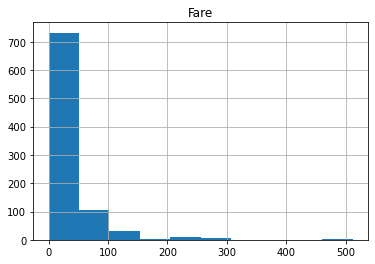

In [49]:
train_data1.hist('Fare')

In [50]:
train_data2.to_csv(r'C:\Users\kgu96\Desktop\DS\Begginer\Titanic\titanic\finaltrainset.csv',index=None)
test_data2.to_csv(r'C:\Users\kgu96\Desktop\DS\Begginer\Titanic\titanic\finaltestset.csv',index=None)

In [51]:
train_data3 = train_data2.copy()
test_data3 = test_data2.copy()

In [52]:
train_data3['logfare'] = np.log(train_data1['Fare']+1)
test_data3['logfare'] = np.log(test_data1['Fare']+1)

In [53]:
test_data3.loc[test_data3['logfare'].isna(),'logfare'] = test_data3['logfare'].mean()

In [54]:
features = train_data3.drop('Survived',axis=1)
target=train_data3['Survived']

In [55]:
features_test = test_data3


In [56]:
features = pd.get_dummies(features,drop_first=True)

In [57]:
features_test = pd.get_dummies(features_test,drop_first=True)

In [58]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pclass            891 non-null    int64  
 1   SibSp             891 non-null    int64  
 2   Parch             891 non-null    int64  
 3   Gender            891 non-null    int64  
 4   fill_age          891 non-null    float64
 5   Mother            891 non-null    int64  
 6   Children          891 non-null    int64  
 7   respectable       891 non-null    int64  
 8   family            891 non-null    int64  
 9   logfare           891 non-null    float64
 10  name_title_Mr     891 non-null    uint8  
 11  name_title_Mrs    891 non-null    uint8  
 12  name_title_Ms     891 non-null    uint8  
 13  name_title_other  891 non-null    uint8  
dtypes: float64(2), int64(8), uint8(4)
memory usage: 73.2 KB


In [59]:
features_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pclass            418 non-null    int64  
 1   SibSp             418 non-null    int64  
 2   Parch             418 non-null    int64  
 3   Gender            418 non-null    int64  
 4   fill_age          418 non-null    float64
 5   Mother            418 non-null    int64  
 6   Children          418 non-null    int64  
 7   respectable       418 non-null    int64  
 8   family            418 non-null    int64  
 9   logfare           418 non-null    float64
 10  name_title_Mr     418 non-null    uint8  
 11  name_title_Mrs    418 non-null    uint8  
 12  name_title_Ms     418 non-null    uint8  
 13  name_title_other  418 non-null    uint8  
dtypes: float64(2), int64(8), uint8(4)
memory usage: 34.4 KB


## KKN

In [60]:
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
feature_normalize = normalize(features)
feature_normalize_test = normalize(features_test)
cvs_mean=[]
for k in np.arange(1,25):
    knn_clf = KNeighborsClassifier(n_neighbors=k,weights='uniform')
    cvs = cross_val_score(knn_clf,feature_normalize,target,cv=4)
    cvs_mean.append(cvs.mean())
best_accuracy= np.max(cvs_mean)
best_k =np.argmax(cvs_mean)+1 
                      
(best_accuracy,best_k)

(0.8171181270957055, 4)

In [58]:
for k in np.arange(1,9):
    knn_clf = KNeighborsClassifier(n_neighbors=k,weights='uniform')
    cvs = cross_val_score(knn_clf,feature_normalize,target,cv=4)
    cvs_mean.append(cvs.mean())
best_accuracy= np.max(cvs_mean)
best_k =np.argmax(cvs_mean)+1 
                      
(best_accuracy,best_k)

(0.8171181270957055, 4)

In [61]:
knn_clf = KNeighborsClassifier(n_neighbors=best_k,weights='uniform')
knn_clf.fit(feature_normalize,target)
y_pre_knn = knn_clf.predict(feature_normalize)
confusion_matrix(target,y_pre_knn)

array([[526,  23],
       [ 90, 252]], dtype=int64)

In [143]:
knn_clf1 = KNeighborsClassifier(n_neighbors=4,weights='uniform')
knn_clf1.fit(feature_normalize,target)
y_pre_knn1 = knn_clf1.predict(feature_normalize)
confusion_matrix(target,y_pre_knn1)

array([[526,  23],
       [ 90, 252]], dtype=int64)

In [144]:
y_knn_train_proba1 = knn_clf1.predict_proba(feature_normalize)

In [145]:
y_pre_test1 = knn_clf1.predict(feature_normalize_test)
y_pre_test_proba1 = knn_clf1.predict_proba(feature_normalize_test)

In [146]:
from sklearn.metrics import recall_score
recall_score(target, y_pre_knn1)

0.7368421052631579

In [147]:
knn_clf2 = KNeighborsClassifier(n_neighbors=2,weights='uniform')
knn_clf2.fit(feature_normalize,target)
y_pre_knn2 = knn_clf2.predict(feature_normalize)
confusion_matrix(target,y_pre_knn2)

array([[548,   1],
       [111, 231]], dtype=int64)

In [68]:
knn_clf3 = KNeighborsClassifier(n_neighbors=3,weights='uniform')
knn_clf3.fit(feature_normalize,target)
y_pre_knn3 = knn_clf3.predict(feature_normalize)
confusion_matrix(target,y_pre_knn3)

array([[514,  35],
       [ 63, 279]], dtype=int64)

## logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000,C=4)
lr.fit(features,target)
y_pre_lr=lr.predict(features)
y_pre_lr_proba=lr.predict_proba(features)

In [84]:
y_lr = lr.predict_proba(feature_normalize)

In [85]:
cvs_lr = cross_val_score(lr,features,target,cv=4)
cvs_mean_lr = cvs_lr.mean()
cvs_mean_lr

0.8227083585827981

In [86]:
confusion_matrix(target,y_pre_lr)


array([[484,  65],
       [ 89, 253]], dtype=int64)

In [87]:
from sklearn.metrics import recall_score
recall_score(target, y_pre_lr)

0.7397660818713451

In [88]:
from sklearn.metrics import precision_score
precision_score(target,y_pre_lr)

0.7955974842767296

In [89]:
y_pre_lr_test=lr.predict(features)
y_pre_lr_proba_test=lr.predict_proba(features)

## SVC

In [ ]:

svc = SVC(kernel = 'linear',probability=True)
param = {'C':np.arange(1,26,5)}
svc = GridSearchCV(svc,param)
svc.fit(features,target)
y_val_pred = svc.predict(features)


In [71]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc = SVC(kernel = 'linear',probability=True)
svc.fit(features,target)
y_val_pred = svc.predict(features)

In [72]:
confusion_matrix(target,y_val_pred)


array([[486,  63],
       [ 94, 248]], dtype=int64)

In [73]:
y_svc_proba = svc.predict_proba(features)

In [74]:
y_svc_test = svc.predict(features_test)

In [75]:
precision_score(target,y_val_pred)

0.797427652733119

In [76]:
cvs = cross_val_score(svc,features,target,cv=4)
cvs.mean()

0.8204308568658345

## RBF

In [90]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svcrbf = SVC(kernel = 'rbf',probability=True,C=5)
svcrbf.fit(features,target)
y_val_pred = svcrbf.predict(features)


In [91]:
y_svc_pred = svcrbf.predict(features)


In [94]:
y_svcrbf_proba = svcrbf.predict_proba(features)

In [95]:
confusion_matrix(target,y_svc_pred)


array([[478,  71],
       [ 93, 249]], dtype=int64)

In [96]:
precision_score(target,y_svc_pred)

0.778125

In [97]:
cvs = cross_val_score(svcrbf,features,target,cv=4)
cvs.mean()

0.8103512705530643

## sigmoid

In [154]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svcg = SVC(kernel = 'sigmoid',probability=True)
param = {'C':np.arange(1,21,5)}
svcg = GridSearchCV(svcg,param)
svcg.fit(features,target)
y_svcg_pred = svcg.predict(features)


In [155]:
confusion_matrix(target,y_svcg_pred)


array([[368, 181],
       [190, 152]], dtype=int64)

In [158]:
svcg.best_estimator_

SVC(C=1, kernel='sigmoid', probability=True)

In [159]:
y_svcg_pred = svcg.predict(features)
y_svcg_pred_proba = svcg.predict_proba(features)


## voting model

In [148]:
from sklearn.ensemble import VotingClassifier
clf= VotingClassifier(estimators=[('lr', lr),('knn1', knn_clf1),('svc1',svcrbf),('rfc',rfc)], voting='soft')
clf.fit(features,target)
y_pre=clf.predict(features)

In [149]:
confusion_matrix(target,y_pre)


array([[510,  39],
       [ 66, 276]], dtype=int64)

In [150]:
precision_score(target,y_pre)

0.8761904761904762

In [151]:
cvs = cross_val_score(clf,features,target,cv=10)
cvs.mean()

0.8361423220973782

In [152]:
cvs = cross_val_score(clf,features,target,cv=4)
cvs_mean = cvs.mean()
cvs_mean

0.8294297660889589

In [153]:
y_pre_test=clf.predict(features_test)

In [154]:
y_pre_test

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [155]:
df_test = pd.DataFrame(y_pre_test)


In [156]:
test_data1 =  test_data.copy()
test_data1['Survived'] = y_pre_test
test_data2 = test_data1.loc[:,['PassengerId','Survived']]
test_data2.set_index('PassengerId',inplace=True) 

In [157]:
test_data2.to_csv(r'C:\Users\kgu96\Desktop\DS\Begginer\Titanic\titanic\predictedtest1.csv')

In [142]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=25)
rfc.fit(features,target)


RandomForestClassifier(n_estimators=25)

In [130]:
cvs = cross_val_score(rfc,features,target,cv=5)
cvs.mean()

0.8148327160881299